In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from plotnine import *
from umap import UMAP

### We're going to load in the data as before but group by document.

In [2]:
w2v = Word2Vec.load("../word2vec/w2v.model")
ted_talk_topics = pd.read_csv("../talk_topics.txt", sep="\t")
print(ted_talk_topics.head())

   file_id                                               tags
0        1  talks, business, creativity, curiosity, goal-s...
1        2  talks, Planets, TEDx, bacteria, biology, engin...
2        3  talks, Debate, Guns, activism, big problems, c...
3        4  talks, Brazil, Slavery, art, beauty, community...
4        5  talks, NASA, communication, computers, creativ...


In [3]:
terms = []
for x in ted_talk_topics['tags'].values:
    terms += [i for i in word_tokenize(x.lower()) if i!=',']
Counter(terms).most_common(20)

[('talks', 2085),
 ('ted', 904),
 ('conference', 703),
 ('technology', 596),
 ('science', 475),
 ('culture', 453),
 ('global', 428),
 ('issues', 428),
 ('design', 415),
 ('tedx', 322),
 ('business', 311),
 ('health', 308),
 ('entertainment', 267),
 ('arts', 185),
 ('brain', 161),
 ('education', 159),
 ('politics', 157),
 ('creativity', 149),
 ('change', 149),
 ('music', 147)]

### Aggregate the word vector representations for each talk's set of tags ("document")

p.s. Don't forget to add empty vectors for words we can't find!

In [4]:
doc_vectors = []
for ix, row in ted_talk_topics.iterrows():
    tags = [x for x in word_tokenize(row['tags'].lower()) if x!=',']
    doc_vector = []
    for tag in tags:
        if tag in w2v.wv.vocab:
            doc_vector.append(w2v.wv.get_vector(tag))
        else:
            doc_vector.append(np.zeros(100))
    doc_vector = np.mean(doc_vector, axis=0)
    doc_vectors.append(doc_vector)

## Visualize the documents in a 2-D space to see if we can identify clusters of topics

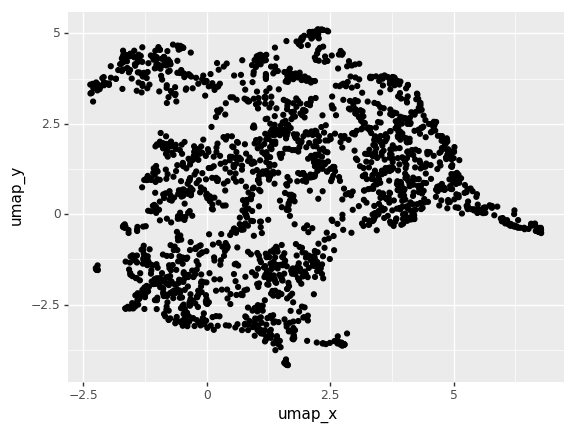

<ggplot: (-9223372036524186161)>

In [5]:
umap_ = UMAP(metric='cosine')
umap_df = pd.DataFrame(umap_.fit_transform(doc_vectors), columns=['umap_x', 'umap_y'])
ggplot(umap_df, aes("umap_x", "umap_y")) + geom_point()